<a href="https://colab.research.google.com/github/IaponaMother/Artificial_Neuron/blob/master/%D0%BA%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = _URL, extract=True)

68616192/68606236 [==============================] - 0s 0us/step


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

validation_image_generator = ImageDataGenerator(rescale=1./255)

image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40, # поворот на 40 градусов
    zoom_range = 0.2, # увеличение изображения
    horizontal_flip = True, # переворот по горизонтали
    fill_mode = 'nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE, directory = validation_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


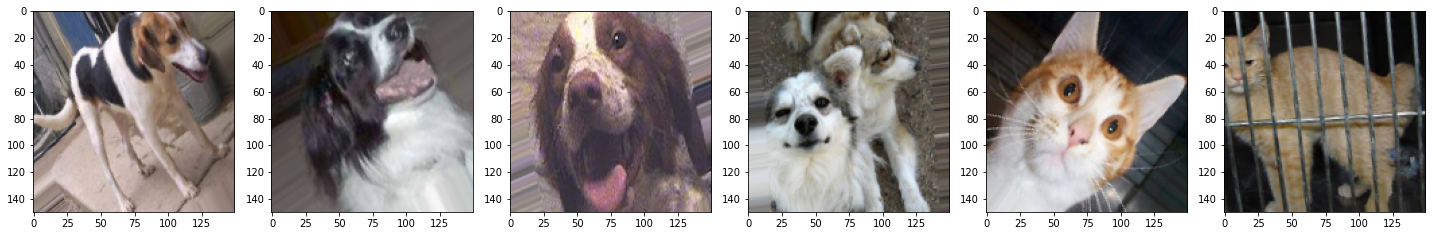

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

sample_training_images,_ = next(train_data_gen)
s = 6
def plotImages(images_arr):
  fig, axes = plt.subplots(1, s, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:s])

In [ ]:
model1 = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMG_SHAPE, IMG_SHAPE, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                     
                                    tf.keras.layers.Dense(1024, activation = 'relu'),
                                    tf.keras.layers.Dense(30, activation = 'linear'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model2 = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMG_SHAPE, IMG_SHAPE, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                     
                                    tf.keras.layers.Dropout(rate = 0.35),
                                    tf.keras.layers.Dense(1024, activation = 'relu'),
                                    tf.keras.layers.Dropout(rate = 0.2),
                                    
                                    tf.keras.layers.Dense(30, activation = 'linear'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')

])




In [ ]:
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model1.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/ float(BATCH_SIZE))),
    epochs = 15,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
20/20 [==============================] - 30s 835ms/step - loss: 4.5936 - acc: 0.5090 - val_loss: 0.6928 - val_acc: 0.5020
Epoch 2/15
20/20 [==============================] - 17s 839ms/step - loss: 0.6930 - acc: 0.5035 - val_loss: 0.6927 - val_acc: 0.4980
Epoch 3/15
20/20 [==============================] - 17s 845ms/step - loss: 0.6892 - acc: 0.5320 - val_loss: 0.6742 - val_acc: 0.5560
Epoch 4/15
20/20 [==============================] - 17s 841ms/step - loss: 0.6723 - acc: 0.6150 - val_loss: 0.6617 - val_acc: 0.6500
Epoch 5/15
20/20 [==============================] - 17s 845ms/step - loss: 0.6533 - acc: 0.6365 - val_loss: 0.6438 - val_acc: 0.6290
Epoch 6/15
20/20 [==============================] - 17s 847ms/step - loss: 0.6377 - acc: 0.6545 - val_loss: 0.6793 - val_acc: 0.6000
Epoch 7/15
20/20 [==============================] - 17s 835ms/step - loss: 0.6353 - acc: 0.6500 - val_loss: 0.6356 - val_acc: 0.6400
Epoch 8/15
20/20 [==============================] - 17s 837ms/step - 

In [ ]:
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])
history2 = model2.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/ float(BATCH_SIZE))),
    epochs = 15,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
20/20 [==============================] - 17s 843ms/step - loss: 3.0881 - acc: 0.5025 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 2/15
20/20 [==============================] - 17s 839ms/step - loss: 0.6930 - acc: 0.5040 - val_loss: 0.6897 - val_acc: 0.5030
Epoch 3/15
20/20 [==============================] - 16s 822ms/step - loss: 0.6883 - acc: 0.5540 - val_loss: 0.6753 - val_acc: 0.5620
Epoch 4/15
20/20 [==============================] - 16s 824ms/step - loss: 0.6708 - acc: 0.6055 - val_loss: 0.6732 - val_acc: 0.5930
Epoch 5/15
20/20 [==============================] - 17s 871ms/step - loss: 0.6530 - acc: 0.6260 - val_loss: 0.6759 - val_acc: 0.6130
Epoch 6/15
20/20 [==============================] - 22s 1s/step - loss: 0.6383 - acc: 0.6550 - val_loss: 0.6221 - val_acc: 0.6620
Epoch 7/15
20/20 [==============================] - 19s 950ms/step - loss: 0.6300 - acc: 0.6650 - val_loss: 0.6336 - val_acc: 0.6600
Epoch 8/15
20/20 [==============================] - 17s 827ms/step - los

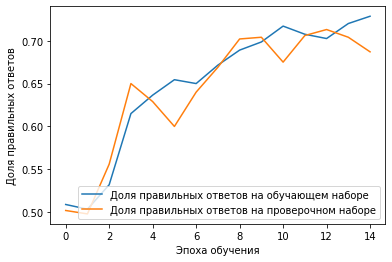

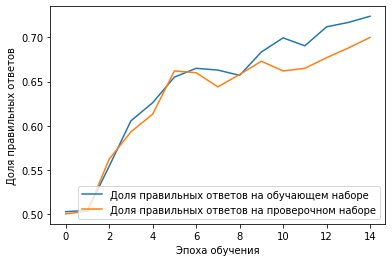

In [ ]:
plt.plot(history.history["acc"],
         label = "Доля правильных ответов на обучающем наборе")
plt.plot(history.history["val_acc"],
         label="Доля правильных ответов на проверочном наборе")
plt.xlabel("Эпоха обучения")
plt.ylabel("Доля правильных ответов")
plt.legend()
plt.show()


plt.plot(history2.history["acc"],
         label = "Доля правильных ответов на обучающем наборе")
plt.plot(history2.history["val_acc"],
         label="Доля правильных ответов на проверочном наборе")
plt.xlabel("Эпоха обучения")
plt.ylabel("Доля правильных ответов")
plt.legend()
plt.show()

In [ ]:
# from tensorflow.keras.preprocessing import image
# from google.colab import files

# img = image.load_img('dog.jpg', target_size = (IMG_SHAPE, IMG_SHAPE))
# plt.imshow(img)
# plt.show()
# x = image.img_to_array(img)
# x /= 255
# x = np.expand_dims(x, axis = 0)
# prediction = np.argmax(model2.predict(x))
# print(prediction)

# img = image.load_img('cat.jpg', target_size = (IMG_SHAPE, IMG_SHAPE))
# plt.imshow(img)
# plt.show()
# x = image.img_to_array(img)
# x /= 255
# x = np.expand_dims(x, axis = 0)
# prediction = np.argmax(model2.predict(x))
# print(prediction)